# Rings Mapper

A script that creates map-like scatter plot, with rings used to show the change in size over two periods. 

In [87]:
import pandas as pd
import numpy as np
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [92]:
# Using the coordinates of Australian airports. Then creates two columns of random values
df_coords = pd.read_csv('CSVs/coords/airport_codes_coords.csv')
df_coords['RandomA'] = np.random.randint(1, 100, df_coords.shape[0])
df_coords['RandomB'] = np.random.randint(1, 100, df_coords.shape[0])
df_coords = df_coords[::20]

In [93]:
# Calculate parameters for width and height of map

latitudes = df_coords['latitude']
latmin, latmax = latitudes.min(), latitudes.max()
latsize = latmax - latmin

longitudes = df_coords['longitude']
lonmin, lonmax = longitudes.min(), longitudes.max()
lonsize = lonmax - lonmin

figsize = np.array([lonsize, latsize])

In [94]:
def ringPlotter(colA, colB, scaler, resizer):

    dfx = df_coords

    dfx = dfx.fillna(0)
    
    dfx['diff'] = dfx[colB] - dfx[colA]
    dfx['abs'] = abs(dfx['diff'])
    dfx['mid'] = np.where(dfx[colA] >= dfx[colB], ((dfx[colA] - dfx[colB])/2) + dfx[colB], ((dfx[colB] - dfx[colA])/2) + dfx[colA])
    dfx['pc'] = (dfx['diff'] / dfx[colA] * 100).apply(lambda x: round(x,2))

    transparency = 0.55
    dfx['color'] = np.where(dfx['diff'] <= 0, f'rgba(234, 0, 136, {transparency})', f'rgba(42, 34, 74, {transparency})')
    
    marker_sizes1 = list(dfx[colA].fillna(0))
    marker_sizes1 = [x/scaler for x in marker_sizes1]
    
    marker_sizes2 = list(dfx['mid'].fillna(0))
    marker_sizes2 = [x/scaler for x in marker_sizes2]

    marker_linewidth3 = [x/2 for x in list(dfx['abs'])]
    marker_linewidth3 = [x/scaler for x in marker_linewidth3]

    
    # PLOT
    fig = go.Figure()
    
    
    # first add a basic dot for each airport 
    fig.add_scatter( 
        mode="markers",
        x = dfx['longitude'],
        y = dfx['latitude'],
        marker=dict(size = 1, color='brown', opacity=0.75),
        hoverinfo='skip'
    )
    
    
        # colA ring
    fig.add_scatter( 
            mode="markers",
            x = dfx['longitude'],
            y = dfx['latitude'],
            marker=dict(size = marker_sizes1, color='rgba(255, 255, 255, 0)', opacity=1, line=dict(width=2, color=dfx['color'])),
            hoverinfo='skip',
    )
    
    # ring fill
    fig.add_scatter( 
            mode="markers",
            x = dfx['longitude'], y = dfx['latitude'],
            marker=dict(size = marker_sizes2, color='rgba(255, 255, 255, 0)', opacity=0.75, line=dict(width=marker_linewidth3, color=dfx['color'])),
            hovertext = dfx['name'].str.title() + ': ' +  dfx['pc'].apply(lambda x:str(x)) + '%<br>' + dfx[colA].apply(lambda x:str(x).split('.')[0]) + '; ' +  dfx[colB].apply(lambda x:str(x).split('.')[0]), hoverinfo="text" ,
            name=''
    )

    fig.update_layout(title={"yref": "paper", "y" : 1,"yanchor" : "bottom"})
    
    fig.update_layout(title_text=f"<b>Difference in number, {colA} vs {colB}</b><br><span style='font-size:8pt'>The opaque ring is the starting size. Red padding shows size of decrease; black padding shows size of increase.</span>", )

    fig.update_layout(height=100 + (figsize[1] * resizer), width=figsize[0] * resizer, showlegend=False, plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    
    fig['layout'].update(margin=dict(l=0,r=0,b=0,t=20))
    
    fig.update_layout(font_family="Arial", font_color="#181818")

    fig.update_xaxes(showline=False, showgrid=False, visible=False)
    fig.update_yaxes(showline=False, showgrid=False, visible=False)
    
    fig.write_html("HTMLs/ringMap_linear_basic_daily_airport_traffic_2019cfFY2021.html")

    fig.show() 

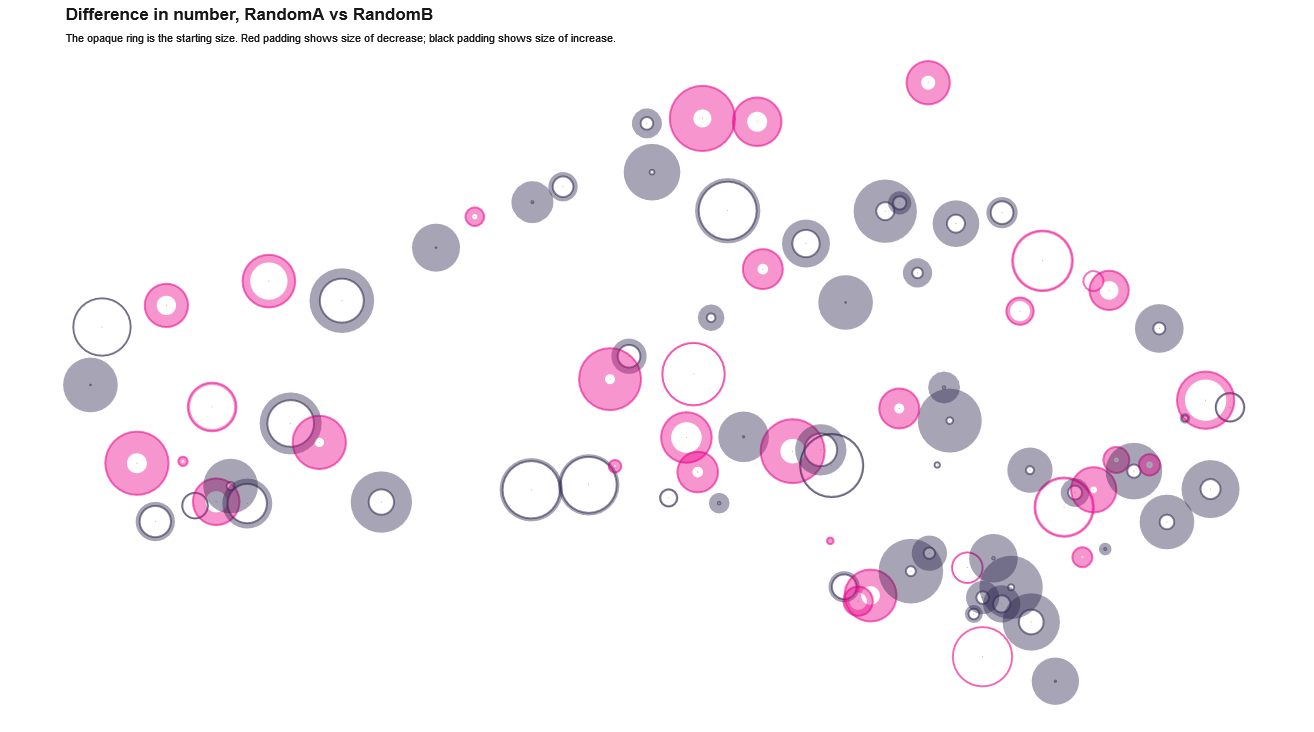

In [95]:
ringPlotter('RandomA', 'RandomB', 1.5, 20)